# 欄位介紹
### InvoiceNo: 發票號碼. 唯一值, "C"開頭代表該交易取消
### ItemCode: 產品代碼, 每個產品的唯一值
### DescriptionCode: 商品敘述代碼
### Quantity: 每個商品數量
### SellDate: 發票產生時間, 代表每筆交易發生的日期跟時間
### NewTaiwanDollors: 物品單價
### CustomerID: 用戶代碼, 唯一值
### District: 銷售縣市

## 1. 該題目為監督是學習或是非監督是學習

### 該題目是非監督是學習, 需要透過分群的方式找出每個群所需要的行銷方式

## 2.將sqlite的檔案透過pandas格式進行資料處理

### 1. 取出sqlite資料

In [1]:
import pandas as pd
import sqlite3
from datetime import datetime, timedelta

## 取出sqlite所有的tabel name
conn=sqlite3.connect('ecommerce.db')
cu=conn.cursor()
cu.execute("select name from sqlite_master where type='table'")
tab_name=cu.fetchall()
tab_name=[tab_name[x][0] for x in range(len(tab_name))]

## 取出sqlite資料
select_sql_data = 'select * FROM ' + tab_name[0]
pd_data = pd.read_sql(select_sql_data,conn)
print(pd_data)

       InvoiceNo ItemCode DescriptionCode  Quantity         SellDate  \
0         536365   85123A         1546686         6   12/1/2018 8:26   
1         536365    71053         1466048         6   12/1/2018 8:26   
2         536365   84406B         4510747         8   12/1/2018 8:26   
3         536365   84029G         6497318         6   12/1/2018 8:26   
4         536365   84029E         3876120         6   12/1/2018 8:26   
...          ...      ...             ...       ...              ...   
541904    581587    22613         2299374        12  12/9/2011 12:50   
541905    581587    22899         8879580         6  12/9/2011 12:50   
541906    581587    23254         3140812         4  12/9/2011 12:50   
541907    581587    23255         5796013         4  12/9/2011 12:50   
541908    581587    22138         7142903         3  12/9/2011 12:50   

        NewTaiwanDollors  CustomerID             District  
0                  255.0     17850.0  Zhongzheng District  
1              

In [2]:
# 轉換時間格式
pd_data['SellDate'] = pd.to_datetime(pd_data['SellDate'], format="%m/%d/%Y %H:%M")
pd_data

InvoiceNo ItemCode DescriptionCode  Quantity            SellDate  \
0         536365   85123A         1546686         6 2018-12-01 08:26:00   
1         536365    71053         1466048         6 2018-12-01 08:26:00   
2         536365   84406B         4510747         8 2018-12-01 08:26:00   
3         536365   84029G         6497318         6 2018-12-01 08:26:00   
4         536365   84029E         3876120         6 2018-12-01 08:26:00   
...          ...      ...             ...       ...                 ...   
541904    581587    22613         2299374        12 2011-12-09 12:50:00   
541905    581587    22899         8879580         6 2011-12-09 12:50:00   
541906    581587    23254         3140812         4 2011-12-09 12:50:00   
541907    581587    23255         5796013         4 2011-12-09 12:50:00   
541908    581587    22138         7142903         3 2011-12-09 12:50:00   

        NewTaiwanDollors  CustomerID             District  
0                  255.0     17850.0  Zhongzheng District  
1                  339.0     17850.0  Zhongzheng District  
2                  275.0     17850.0  Zhongzheng District  
3                  339.0     17850.0  Zhongzheng District  
4                  339.0     17850.0  Zhongzheng District  
...                  ...         ...                  ...  
541904              85.0     12680.0      Datong District  
541905             210.0     12680.0      Datong District  
541906             415.0     12680.0      Datong District  
541907             415.0     12680.0      Datong District  
541908             495.0     12680.0      Datong District  

[541909 rows x 8 columns]

In [3]:
pd_data = pd_data.drop(['DescriptionCode'], axis=1)
print(pd_data)

       InvoiceNo ItemCode  Quantity            SellDate  NewTaiwanDollors  \
0         536365   85123A         6 2018-12-01 08:26:00             255.0   
1         536365    71053         6 2018-12-01 08:26:00             339.0   
2         536365   84406B         8 2018-12-01 08:26:00             275.0   
3         536365   84029G         6 2018-12-01 08:26:00             339.0   
4         536365   84029E         6 2018-12-01 08:26:00             339.0   
...          ...      ...       ...                 ...               ...   
541904    581587    22613        12 2011-12-09 12:50:00              85.0   
541905    581587    22899         6 2011-12-09 12:50:00             210.0   
541906    581587    23254         4 2011-12-09 12:50:00             415.0   
541907    581587    23255         4 2011-12-09 12:50:00             415.0   
541908    581587    22138         3 2011-12-09 12:50:00             495.0   

        CustomerID             District  
0          17850.0  Zhongzheng Di

## 3.1 資料探勘,透過視覺化的方式觀察資料分布與分析

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### 資料描述

In [5]:
pd_data.describe()

Quantity  NewTaiwanDollors     CustomerID
count  541909.000000      5.419090e+05  406829.000000
mean        9.552250      4.611114e+02   15287.690570
std       218.081158      9.675985e+03    1713.600303
min    -80995.000000     -1.106206e+06   12346.000000
25%         1.000000      1.250000e+02   13953.000000
50%         3.000000      2.080000e+02   15152.000000
75%        10.000000      4.130000e+02   16791.000000
max     80995.000000      3.897000e+06   18287.000000

### 缺失值

In [6]:
pd_data.isnull().sum()

InvoiceNo                0
ItemCode                 0
Quantity                 0
SellDate                 0
NewTaiwanDollors         0
CustomerID          135080
District                 0
dtype: int64

### 基於顧客

In [7]:
user_grouped=pd_data.groupby('CustomerID').sum()
user_grouped.head()

Quantity  NewTaiwanDollors
CustomerID                            
12346.0            0             208.0
12347.0         2458           48121.0
12348.0         2341           17871.0
12349.0          631           60510.0
12350.0          197            6530.0

In [8]:
user_grouped.describe()

Quantity  NewTaiwanDollors
count    4372.000000      4.372000e+03
mean     1122.344007      3.220082e+04
std      4672.790720      1.284783e+05
min      -303.000000      0.000000e+00
25%       153.000000      5.286500e+03
50%       365.000000      1.300950e+04
75%       962.250000      3.023325e+04
max    196719.000000      4.137633e+06

### 基於時間的銷售數量

Text(0.5, 0, 'SellDate')

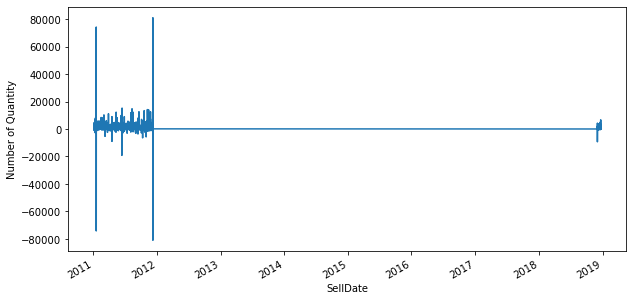

In [9]:
pd_data.groupby('SellDate').Quantity.sum().plot(figsize=(10,5))
plt.ylabel('Number of Quantity')
plt.xlabel('SellDate')

### 基於地區的銷售數量

<AxesSubplot:xlabel='District'>

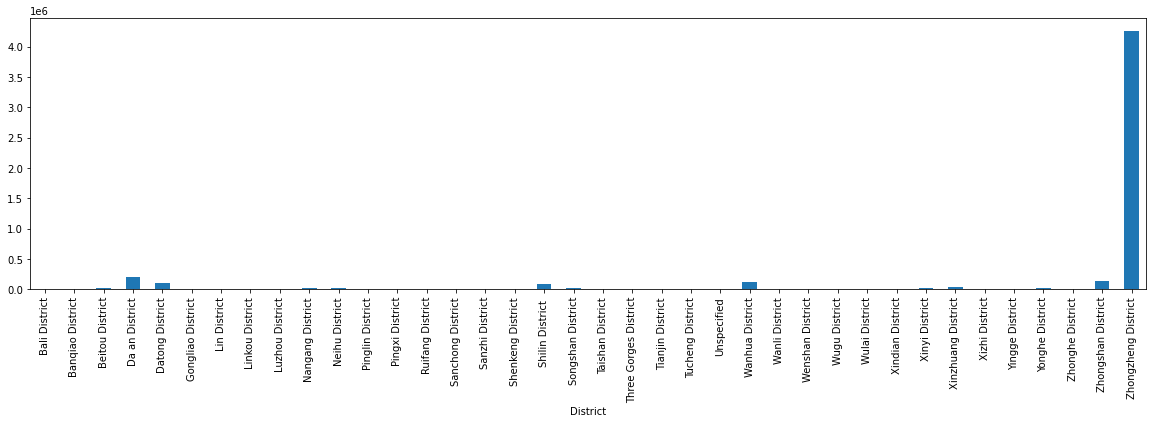

In [10]:
pd_data.groupby('District').Quantity.sum().plot(kind='bar',figsize=(20,5))

## 3.2 那些資料需要預處理?預處理的方式?預處理後的資料分析?

#### 1.去除重複值
#### 2.CustomerID: 需要將缺失值的整列資料去除
#### 3.每列計算單個產品銷售總金額
#### 4.RFM Model分析須關注的客戶群

#### 去除重複

In [11]:
# 原始資料
duplicate_rows_df = pd_data[pd_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
print("count cloum number:")
print(pd_data.count())

number of duplicate rows:  (5270, 7)
count cloum number:
InvoiceNo           541909
ItemCode            541909
Quantity            541909
SellDate            541909
NewTaiwanDollors    541909
CustomerID          406829
District            541909
dtype: int64


In [12]:
# 去除重複後資料
pd_new_data = pd_data.drop_duplicates()
pd_new_data.count()

InvoiceNo           536639
ItemCode            536639
Quantity            536639
SellDate            536639
NewTaiwanDollors    536639
CustomerID          401602
District            536639
dtype: int64

#### 去除缺失值

In [13]:
print("number of loss data: ")
print(pd_new_data.isnull().sum())

number of loss data: 
InvoiceNo                0
ItemCode                 0
Quantity                 0
SellDate                 0
NewTaiwanDollors         0
CustomerID          135037
District                 0
dtype: int64


In [14]:
# 去除丟失值的列資料
pd_clean_data = pd_new_data.dropna()
pd_clean_data.count()

InvoiceNo           401602
ItemCode            401602
Quantity            401602
SellDate            401602
NewTaiwanDollors    401602
CustomerID          401602
District            401602
dtype: int64

## 3.3 視覺化選取特徵的意義

製作RFM Model

In [15]:
# 計算消費金額
pd_clean_data['SellAmount'] = pd_clean_data["Quantity"].multiply(pd_clean_data["NewTaiwanDollors"])
pd_clean_data

<ipython-input-15-0b882148104c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_clean_data['SellAmount'] = pd_clean_data["Quantity"].multiply(pd_clean_data["NewTaiwanDollors"])


InvoiceNo ItemCode  Quantity            SellDate  NewTaiwanDollors  \
0         536365   85123A         6 2018-12-01 08:26:00             255.0   
1         536365    71053         6 2018-12-01 08:26:00             339.0   
2         536365   84406B         8 2018-12-01 08:26:00             275.0   
3         536365   84029G         6 2018-12-01 08:26:00             339.0   
4         536365   84029E         6 2018-12-01 08:26:00             339.0   
...          ...      ...       ...                 ...               ...   
541904    581587    22613        12 2011-12-09 12:50:00              85.0   
541905    581587    22899         6 2011-12-09 12:50:00             210.0   
541906    581587    23254         4 2011-12-09 12:50:00             415.0   
541907    581587    23255         4 2011-12-09 12:50:00             415.0   
541908    581587    22138         3 2011-12-09 12:50:00             495.0   

        CustomerID             District  SellAmount  
0          17850.0  Zhongzheng District      1530.0  
1          17850.0  Zhongzheng District      2034.0  
2          17850.0  Zhongzheng District      2200.0  
3          17850.0  Zhongzheng District      2034.0  
4          17850.0  Zhongzheng District      2034.0  
...            ...                  ...         ...  
541904     12680.0      Datong District      1020.0  
541905     12680.0      Datong District      1260.0  
541906     12680.0      Datong District      1660.0  
541907     12680.0      Datong District      1660.0  
541908     12680.0      Datong District      1485.0  

[401602 rows x 8 columns]

In [16]:
# 去除退貨資訊
pd_clean_data = pd_clean_data[pd_clean_data.Quantity > 0]
pd_clean_data = pd_clean_data[pd_clean_data.NewTaiwanDollors > 0]
pd_clean_data

InvoiceNo ItemCode  Quantity            SellDate  NewTaiwanDollors  \
0         536365   85123A         6 2018-12-01 08:26:00             255.0   
1         536365    71053         6 2018-12-01 08:26:00             339.0   
2         536365   84406B         8 2018-12-01 08:26:00             275.0   
3         536365   84029G         6 2018-12-01 08:26:00             339.0   
4         536365   84029E         6 2018-12-01 08:26:00             339.0   
...          ...      ...       ...                 ...               ...   
541904    581587    22613        12 2011-12-09 12:50:00              85.0   
541905    581587    22899         6 2011-12-09 12:50:00             210.0   
541906    581587    23254         4 2011-12-09 12:50:00             415.0   
541907    581587    23255         4 2011-12-09 12:50:00             415.0   
541908    581587    22138         3 2011-12-09 12:50:00             495.0   

        CustomerID             District  SellAmount  
0          17850.0  Zhongzheng District      1530.0  
1          17850.0  Zhongzheng District      2034.0  
2          17850.0  Zhongzheng District      2200.0  
3          17850.0  Zhongzheng District      2034.0  
4          17850.0  Zhongzheng District      2034.0  
...            ...                  ...         ...  
541904     12680.0      Datong District      1020.0  
541905     12680.0      Datong District      1260.0  
541906     12680.0      Datong District      1660.0  
541907     12680.0      Datong District      1660.0  
541908     12680.0      Datong District      1485.0  

[392690 rows x 8 columns]

In [17]:
# CustomerID 轉換
from datetime import datetime
pd_clean_data['CustomerID'] = pd_clean_data['CustomerID'].astype('int64')

In [18]:
# 最後一筆消費時間
pd_clean_data['SellDate'].max()

Timestamp('2018-12-23 16:06:00')

In [19]:
NOW = datetime(2018,12,24)

# 每個客戶的RFM
rfm_df = pd_clean_data.groupby('CustomerID').agg({
    'SellDate': lambda x: (NOW - x.max()).days, # 近一次消費天
    'InvoiceNo': lambda x: x.nunique(),            # 消費次數
    'SellAmount': lambda x: x.sum()                   # 消費金額
}).reset_index()

rfm_df.rename(
    columns={'SellDate': 'recency', 
             'InvoiceNo': 'frequency', 
             'SellAmount': 'monetary'}, 
    inplace=True
) # 重新命名

rfm_df['user'] = 1 # 繪圖計數用
rfm_df

CustomerID  recency  frequency   monetary  user
0          12346     2896          1  7718360.0     1
1          12347       16          7   431000.0     1
2          12348        7          4   179724.0     1
3          12349     2589          1   175755.0     1
4          12350     2881          1    33440.0     1
...          ...      ...        ...        ...   ...
4333       18280     2848          1    18060.0     1
4334       18281     2751          1     8082.0     1
4335       18282     2578          2    17805.0     1
4336       18283     2574         16   204553.0     1
4337       18287     2613          3   183728.0     1

[4338 rows x 5 columns]

In [20]:
# 根據值將資料分級
# col_val: 輸入值, level: 分級級距
def get_level(col_val, level: list):
    for idx, val in enumerate(reversed(level)):
        if col_val >= val:
            return f'≥{int(val)}'
            
# 分級(以中位數做分級)
recency_level = [0, rfm_df['recency'].median()]
recency_label = [f'≥{int(i)}' for i in recency_level]
rfm_df['recency_label'] = rfm_df['recency'].apply(lambda x: get_level(x, recency_level))

frequency_level = [0, rfm_df['frequency'].median()]
frequency_label = [f'≥{int(i)}' for i in frequency_level]
rfm_df['frequency_label'] = rfm_df['frequency'].apply(lambda x: get_level(x, frequency_level))

monetary_level = [0, rfm_df['monetary'].median()]
monetary_label = [f'≥{int(i)}' for i in monetary_level]
rfm_df['monetary_label'] = rfm_df['monetary'].apply(lambda x: get_level(x, monetary_level))
rfm_df

CustomerID  recency  frequency   monetary  user recency_label  \
0          12346     2896          1  7718360.0     1         ≥2604   
1          12347       16          7   431000.0     1            ≥0   
2          12348        7          4   179724.0     1            ≥0   
3          12349     2589          1   175755.0     1            ≥0   
4          12350     2881          1    33440.0     1         ≥2604   
...          ...      ...        ...        ...   ...           ...   
4333       18280     2848          1    18060.0     1         ≥2604   
4334       18281     2751          1     8082.0     1         ≥2604   
4335       18282     2578          2    17805.0     1            ≥0   
4336       18283     2574         16   204553.0     1            ≥0   
4337       18287     2613          3   183728.0     1         ≥2604   

     frequency_label monetary_label  
0                 ≥0         ≥66857  
1                 ≥2         ≥66857  
2                 ≥2         ≥66857  
3                 ≥0         ≥66857  
4                 ≥0             ≥0  
...              ...            ...  
4333              ≥0             ≥0  
4334              ≥0             ≥0  
4335              ≥2             ≥0  
4336              ≥2         ≥66857  
4337              ≥2         ≥66857  

[4338 rows x 8 columns]

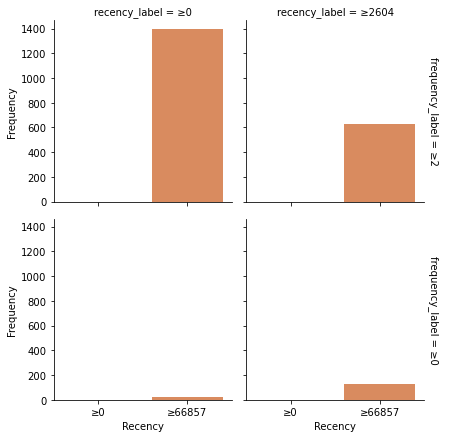

In [21]:
g = sns.FacetGrid(
    rfm_df[rfm_df['monetary_label']==monetary_label[-1]], # 來源資料表 (消費金額高的客戶分析)
    col="recency_label", # X資料來源欄位
    row="frequency_label" ,  # Y資料來源欄位
    col_order=recency_label,  # X資料順序
    row_order=frequency_label[::-1], # Y資料順序
    margin_titles=True  # 小圖啟用
)

g = g.map_dataframe(
    sns.barplot, # 資料顯示的模式
    x='monetary_label', # 小圖表X資料來源
    y='user', # 小圖表Y資料來源，訪客計數
    order=monetary_label, # X資料順序
    estimator=sum,  # Y計數加總
    palette = sns.color_palette("muted") #畫布色調 
) 

g = g.set_axis_labels('Recency','Frequency').add_legend()

In [22]:
# 重要價值客戶 (最近有來消費 & 消費頻率高 & 消費金額高)
vip_value = rfm_df[
    (rfm_df['recency_label'] == recency_label[0]) &
    (rfm_df['frequency_label'] == frequency_label[-1]) &
    (rfm_df['monetary_label'] == monetary_label[-1])
]
print('vip value customer count:',len(vip_value))

vip value customer count: 1396


In [23]:
# 重要開發客戶 (最近有來消費 & 消費頻率低 & 消費金額高)
vip_dev = rfm_df[
    (rfm_df['recency_label'] == recency_label[0]) &
    (rfm_df['frequency_label'] == frequency_label[0]) &
    (rfm_df['monetary_label'] == monetary_label[-1])
]
print('vip dev customer count:',len(vip_dev))

vip dev customer count: 21


In [24]:
# 重要保留客戶 (最近沒有來消費 & 消費頻率低 & 消費金額高)
vip_keep = rfm_df[
    (rfm_df['recency_label'] == recency_label[-1]) &
    (rfm_df['frequency_label'] == frequency_label[0]) &
    (rfm_df['monetary_label'] == monetary_label[-1])
]
print('vip keep customer count:',len(vip_keep))

vip keep customer count: 126


In [25]:
# 重要保持客戶 (最近沒有來消費 & 消費頻率高 & 消費金額高)
vip_mantain = rfm_df[
    (rfm_df['recency_label'] == recency_label[-1]) &
    (rfm_df['frequency_label'] == frequency_label[-1]) &
    (rfm_df['monetary_label'] == monetary_label[-1])
]
print('vip mantain customer count:',len(vip_mantain))

vip mantain customer count: 626


In [26]:
# 本次針對行銷對象為重要保持客戶共1396人

vip_value

CustomerID  recency  frequency  monetary  user recency_label  \
1          12347       16          7  431000.0     1            ≥0   
2          12348        7          4  179724.0     1            ≥0   
9          12356     2593          3  281143.0     1            ≥0   
11         12358     2572          2  116806.0     1            ≥0   
15         12362     2574         10  522623.0     1            ≥0   
...          ...      ...        ...       ...   ...           ...   
4318       18259       15          3  233860.0     1            ≥0   
4319       18260        7          6  262835.0     1            ≥0   
4322       18263     2596          3  121316.0     1            ≥0   
4327       18272     2573          6  307858.0     1            ≥0   
4336       18283     2574         16  204553.0     1            ≥0   

     frequency_label monetary_label  
1                 ≥2         ≥66857  
2                 ≥2         ≥66857  
9                 ≥2         ≥66857  
11                ≥2         ≥66857  
15                ≥2         ≥66857  
...              ...            ...  
4318              ≥2         ≥66857  
4319              ≥2         ≥66857  
4322              ≥2         ≥66857  
4327              ≥2         ≥66857  
4336              ≥2         ≥66857  

[1396 rows x 8 columns]

In [27]:
rfm_df

CustomerID  recency  frequency   monetary  user recency_label  \
0          12346     2896          1  7718360.0     1         ≥2604   
1          12347       16          7   431000.0     1            ≥0   
2          12348        7          4   179724.0     1            ≥0   
3          12349     2589          1   175755.0     1            ≥0   
4          12350     2881          1    33440.0     1         ≥2604   
...          ...      ...        ...        ...   ...           ...   
4333       18280     2848          1    18060.0     1         ≥2604   
4334       18281     2751          1     8082.0     1         ≥2604   
4335       18282     2578          2    17805.0     1            ≥0   
4336       18283     2574         16   204553.0     1            ≥0   
4337       18287     2613          3   183728.0     1         ≥2604   

     frequency_label monetary_label  
0                 ≥0         ≥66857  
1                 ≥2         ≥66857  
2                 ≥2         ≥66857  
3                 ≥0         ≥66857  
4                 ≥0             ≥0  
...              ...            ...  
4333              ≥0             ≥0  
4334              ≥0             ≥0  
4335              ≥2             ≥0  
4336              ≥2         ≥66857  
4337              ≥2         ≥66857  

[4338 rows x 8 columns]

#### 資料變換

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
rfm_df['recency_label'] = labelencoder.fit_transform(rfm_df['recency_label'])
rfm_df['frequency_label'] = labelencoder.fit_transform(rfm_df['frequency_label'])
rfm_df['monetary_label'] = labelencoder.fit_transform(rfm_df['monetary_label'])
rfm_df

CustomerID  recency  frequency   monetary  user  recency_label  \
0          12346     2896          1  7718360.0     1              1   
1          12347       16          7   431000.0     1              0   
2          12348        7          4   179724.0     1              0   
3          12349     2589          1   175755.0     1              0   
4          12350     2881          1    33440.0     1              1   
...          ...      ...        ...        ...   ...            ...   
4333       18280     2848          1    18060.0     1              1   
4334       18281     2751          1     8082.0     1              1   
4335       18282     2578          2    17805.0     1              0   
4336       18283     2574         16   204553.0     1              0   
4337       18287     2613          3   183728.0     1              1   

      frequency_label  monetary_label  
0                   0               1  
1                   1               1  
2                   1               1  
3                   0               1  
4                   0               0  
...               ...             ...  
4333                0               0  
4334                0               0  
4335                1               0  
4336                1               1  
4337                1               1  

[4338 rows x 8 columns]

In [29]:
new_df = rfm_df.drop(['CustomerID','recency','frequency','monetary','user'], axis=1)
new_df

recency_label  frequency_label  monetary_label
0                 1                0               1
1                 0                1               1
2                 0                1               1
3                 0                0               1
4                 1                0               0
...             ...              ...             ...
4333              1                0               0
4334              1                0               0
4335              0                1               0
4336              0                1               1
4337              1                1               1

[4338 rows x 3 columns]

## 特徵的選取
### 1. 來店的頻率 : 頻率高為客戶的消費有喜歡這間店的商品
### 2. 距今來店的時間間隔：時間間隔短的客戶對這間店的依賴性高
### 3. 消費金額：透過來電的頻率及來店的時間間隔判斷是否能判斷此客戶為高消費族群,後續將對此客群提供VIP服務

## 4.1 預計使用甚麼演算法實踐

### 預計使用邏輯回歸證明此推論是否為正確行銷目標

## 4.2 實作

In [30]:
# 建立訓練與測試資料
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(new_df[['recency_label','frequency_label']]
                                                                        ,new_df[['monetary_label']]
                                                                        , random_state=0, train_size=0.8)

In [31]:
from sklearn.linear_model import LogisticRegression

# 建立模型
lr = LogisticRegression()
lr.fit(X_train_data, Y_train_data.values.ravel())
Y_pred = lr.predict(X_train_data)


#計算預測準確率
train_score = lr.score(X_train_data, Y_train_data)
test_score = lr.score(X_test_data,Y_test_data)

print('train_score',train_score)
print('test_score',test_score)

train_score 0.7769452449567723
test_score 0.7741935483870968


## 5.1 那些演算法可以做驗證

### 1.留出法 （holdout cross validation）:原始資料集分為三部分：訓練集、驗證集和測試集。
### 2.k 折交叉驗證（k-fold cross validation）:k 折交叉驗證通過對 k 個不同分組訓練的結果進行平均來減少方差，因此模型的效能對資料的劃分就不那麼敏感。
### 3.自助法 (bootstrapping)：每次隨機從D（樣本數為m）中挑選一個樣本，放入D'中，然後將樣本放回D中，重複m次之後，得到 了包含m個樣本的數據集。


## 5.2 打算使用哪些方法做驗證

### 使用留出法的方式做驗證,因為此方法可以保留大量的訓練資料

## 5.3 驗證的流程與方法

一：簡單的交叉驗證的步驟如下：

1，從全部的訓練數據S中隨機選擇中隨機選擇s的樣例作為訓練集train，剩餘的作為測試集作為測試集test。

2，通過對測試集訓練，得到假設函數或模型。

3，在測試集對每一個樣本根據假設函數或模型，得到訓練集的類標，求出分類正確率。

4，選擇具有最大分類率的模型或假設。

這種方法稱為保持-交叉驗證或稱為簡單交叉驗證。由於測試集和訓練集是分開的，就避免了過擬合的現象

## 6. 假若效果不如預期,原因為何? 後續優化方法?

### 1. 可能效果不如預期的原因有
###  (1) 訓練資料、測試資料、驗證資料與真實的資料內容有落差
###  (2) 訓練資料、測試資料、驗證資料的資料選取有偏差,導致模型訓練效果不如預期
 
### 2. 後續優化方法如下:
###  (1) 持續更新訓練資料, 定期訓練, 以確保資料結構改變時能即時得知結果
###  (2) 透過重複隨機選取測試資料、測試資料、驗證資料反覆驗證模型的真實準確度,並調整資料的選取比例以提升泛化能力